<a href="https://cognitiveclass.ai/">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/SNLogo.png" width="200" align="center">
</a>

<h1>Lab - Classifying Images using IBM Watson Visual Recognition in Python</h1>

<h1>Introduction</h1>

<b>Welcome!</b> This lab is about how to operate the Watson Visual Recognition API and OpenCV using the Python Programming Language. The advantage of using the Watson Visual Recognition API over the Graphic User Interface on the Browser that you did earlier in this course is because you can automate the training, and testing of your Visual Recognition model.

So instead of logging in to your IBM Cloud account so that you can upload a picture that you want to classify, you can upload an image to your Visual Recognition model by running a piece a piece of python code. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Click on the links to go to the following sections:</strong></font>
<br>
<h2>Table of Contents</h2>
<ol>
    <li><a href="#ref1">IBM Watson Package</a></li>
    <li><a href="#ref2">Plotting images in Jupyter Notebooks</a></li>
    <li><a href="#ref3">Classify images with IBM Watson API</a></li>
    <li><a href="#ref4">Detecting Faces with Watson Visual Recognition</a></li>
    <li><a href="#ref5">Exercises</a></li>
</ol>    
</div>

<a id="ref1"></a>
<h2>IBM Watson Package</h2>
In order to run this lab we need to import two packages.
<ul>
    <li>IBM Watson: which allows access to the Watson Visual Recognition API</li>
    <li>OpenCV: a package that will help us with image processing</li>
</ul>
The code below will install Watson Developer Cloud and OpenCV. 

To run, click on the code cell below and press "shift + enter".

<b>NOTE - The Watson Devloper Cloud Package has been deprecated and has been replaced by the IBM Watson Package </b>

In [1]:
#! pip install --upgrade ibm-watson opencv-python

<h4>What (or who) do you see in the following image?</h4>

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg" width="400"></img>  
<b>URL</b>:  
<i>https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg</i>

<a id="ref2"></a>
<h2>Plotting images in Jupyter Notebooks</h2>

Let's use a function to help us display images from a URL: The function below with the name <code>plt_image</code> grabs the image from the internet provided that you supply the web address of the image.<br>

URL stands for Uniform Resource Locator, which in this case the the web address of our image.

In [2]:
import cv2
import urllib.request
from matplotlib import pyplot as plt
from pylab import rcParams

def plt_image(image_url, size = (10,8)):

    # Downloads an image from a URL, and displays it in the notebook
    urllib.request.urlretrieve(image_url, "image.jpg") # downloads file as "image.jpg"
    image = cv2.imread("image.jpg")
    
    # If image is in color, then correct color coding from BGR to RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    rcParams['figure.figsize'] = size[0], size[1] #set image display size

    plt.axis("off")
    plt.imshow(image, cmap="Greys_r")
    plt.show()

Lets grab the image above from the internet and plot it out.

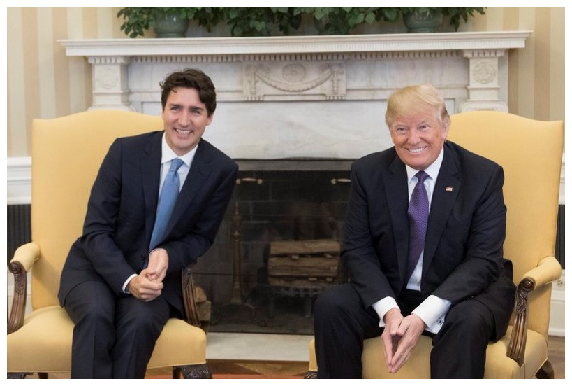

In [3]:
image_url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg'
plt_image(image_url)

<a id="ref3"></a>
<h2>Classify images with IBM Watson API</h2>

<h4>Setting the API key for IBM Watson Visual Recognition</h4>

<p>In order for you to use the IBM Watson Visual Recognition API, you will need the API key of the Visual Recognition instance that you have created in the previous sections.</p>

<p>Log into your IBM Cloud Account with the following link.</p> <a href="https://cocl.us/CV0101EN_IBM_Cloud_Login">https://cloud.ibm.com</a>
<ol>
    <li>Click on <b>Services</b></li>
    <li>Under Services, click on your Watson Visual Recognition Instance</li>
    <li>Copy the <b>API Key</b> and past it in the code cell below</li>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/API_Key.png" width="680">
    <li>Then press "ctrl + enter" to run the code cell.</li>
</ol>

In [4]:
# Paste your API key for IBM Watson Visual Recognition below:
my_apikey = 'FP16S-Wki_srnq5n9Yyii3wdaQvFGpUa8kvncFXrlZV1'

<h4>Initialize Watson Visual Recognition</h4>
Lets create your own Watson Visual Recognition instance, it will allow you to make calls to the Watson Visual Recognition API.

In [5]:
from ibm_watson import VisualRecognitionV3

visrec = VisualRecognitionV3(version = '2019-01-01', 
                             iam_apikey = my_apikey)

#### Identifying Objects in the Image

<p>We can see that there are two persons in the picture above. But does the computer knows this?</p>

<p>Lets call the <b>classify</b> method from the Watson Image Reconition API to see what objects our Image Recognition Model can identify from this picture.</p>

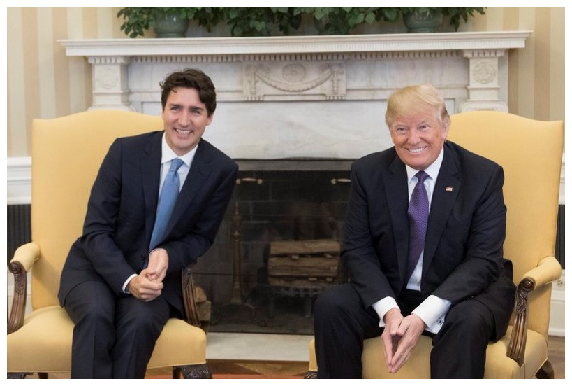

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "official",
              "score": 0.789,
              "type_hierarchy": "/person/official"
            },
            {
              "class": "person",
              "score": 0.82
            },
            {
              "class": "beige color",
              "score": 0.782
            }
          ]
        }
      ],
      "source_url": "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg",
      "resolved_url": "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 0
}


In [6]:
import json

image_url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg'


# threshold is set to 0.6, that means only classes that has a confidence score of 0.6 or greater will be shown
classes = visrec.classify(url=image_url,
                          threshold='0.6',
                          classifier_ids='default').get_result()

plt_image(image_url)
print(json.dumps(classes, indent=2))

Under the field classes you should see the class person, and other classes with their corresponding confidence score. You might get other classes other than person depending on your Visual Recognition model.

<a id="ref4"></a>
<h2>Detecting Faces with Watson Visual Recognition</h2>
<p>Since there are faces in the picture, we can use a Watson Visual Recognition API that detects faces.</p>
<p>The <b>detect_faces</b> method from the Watson Image Reconition API can help use detect faces in this picture.</p>

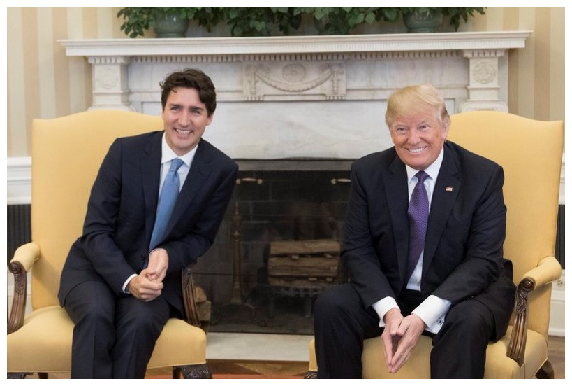

{
  "images": [
    {
      "faces": [
        {
          "age": {
            "min": 59,
            "max": 62,
            "score": 0.75315815
          },
          "face_location": {
            "height": 84,
            "width": 87,
            "left": 546,
            "top": 145
          },
          "gender": {
            "gender": "MALE",
            "gender_label": "male",
            "score": 0.9172811
          }
        },
        {
          "age": {
            "min": 31,
            "max": 36,
            "score": 0.5343688
          },
          "face_location": {
            "height": 77,
            "width": 68,
            "left": 220,
            "top": 125
          },
          "gender": {
            "gender": "MALE",
            "gender_label": "male",
            "score": 0.99950147
          }
        }
      ],
      "source_url": "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017

In [7]:
import json

image_url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg'

classes = visrec.detect_faces(url=image_url,
                          threshold='0.6',
                          classifier_ids='default').get_result()

plt_image(image_url)
print(json.dumps(classes, indent=2))

The the API call we got the age, face_location and gender of the faces in this picture.

<h4>Getting Watson Visual Recognition results as a dataframe</h4>

<p>The problem with the <b>classify</b> and <b>detect_faces</b> method is that it gave an output that is extremely confusing to look at. The output is in a format called JSON which stands for JavaScript Object Notation, we can cleanup the presentation of our output by using the a datastructure called dataframe in the <b>pandas</b> library.</p>

<p>In the code cell below we use a function called <b>getdf_visrec</b> which uses a dataframe can help us easily sort the classified labels by confidence score in descending order.</p>

In [8]:
from pandas.io.json import json_normalize

def getdf_visrec(url, apikey = my_apikey):
    
    json_result = visrec.classify(url=url,
                              threshold='0.6',
                              classifier_ids='default').get_result()
    
    json_classes = json_result['images'][0]['classifiers'][0]['classes']
    
    df = json_normalize(json_classes).sort_values('score', ascending=False).reset_index(drop=True)
    
    return df

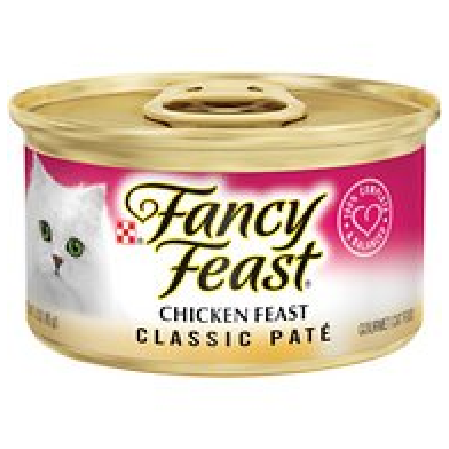

class  score                  type_hierarchy
0               food  0.877                             NaN
1           cat food  0.779             /food/feed/cat food
2               feed  0.779                             NaN
3           toiletry  0.772                             NaN
4  pale yellow color  0.697                             NaN
5               CD-R  0.681             /memory device/CD-R
6      memory device  0.681                             NaN
7        beige color  0.679                             NaN
8        canned food  0.627  /food/food product/canned food
9       food product  0.627                             NaN

In [9]:
url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/76011_MAIN._AC_SS190_V1446845310_.jpg'
plt_image(url)
getdf_visrec(url)

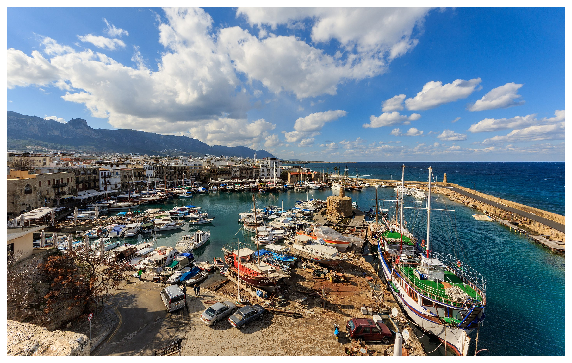

class  score                  type_hierarchy
0             nature  0.933                             NaN
1              shore  0.895                             NaN
2           seashore  0.869          /nature/shore/seashore
3    sea green color  0.864                             NaN
4         blue color  0.858                             NaN
5  natural elevation  0.794                             NaN
6              slope  0.782                             NaN
7              beach  0.612                   /nature/beach
8            seaside  0.601  /nature/shore/seashore/seaside

In [10]:
url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/2880px-Kyrenia_01-2017_img04_view_from_castle_bastion.jpg'
plt_image(url)
getdf_visrec(url)

<a id="ref5"></a>
<h2>Exercises</h2>
<h3>Question 1</h3>
<p>Watson Visual Recognition also has an API to convert image to text, the function <b>image_to_text</b> below converts image to text. Your job is to use the function below by providing it your api key and an image with text to extract the text in the image.</p>

In [11]:
# press Shift+Enter to execute 
import requests

def image_to_text(apikey, url):
    request = 'https://gateway.watsonplatform.net/visual-recognition/api/v3/recognize_text?url={url}&version=2018-03-19'.format(url=url)
    r = requests.get(request , auth=('apikey', apikey))
    return r.json()


In [12]:
# Write your code below and press Shift+Enter to execute 
my_apikey = 'FP16S-Wki_srnq5n9Yyii3wdaQvFGpUa8kvncFXrlZV1'

In [13]:
image_to_text(my_apikey,'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/image_to_text.png')

{'images': [{'source_url': 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/image_to_text.png',
   'resolved_url': 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/image_to_text.png',
   'text': 'detecting faces with watson visual recognition\nsince there are faces in the picture we can use a watson visual recognition api that detects faces\nthe faces method from the watson image reconition api can help use detect faces in this picture',
   'words': [{'word': 'detecting',
     'location': {'height': 36, 'width': 150, 'left': 15, 'top': 14},
     'score': 0.981,
     'line_number': 0},
    {'word': 'faces',
     'location': {'height': 28, 'width': 90, 'left': 175, 'top': 16},
     'score': 0.9657,
     'line_number': 0},
    {'word': 'with',
     'location': {'height': 29, 'width': 67, 'left': 272, 'top': 14},
     'score': 0.9936,
     'line_number': 0},
    {'word': 'watson',
     'location':

Double-click <b>here</b> for the solution.

<!-- The answer is below:
my_apikey = '<paste your api key here>'

image_to_text(my_apikey,'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/image_to_text.png')
-->

<h3>Question 2</h3>
<p>Make a function that uses a pandas dataframe to convert the result into a table format.</p>

In [14]:
# Write your code below and press Shift+Enter to execute 
from pandas.io.json import json_normalize

def get_image_text_df(api, url):
    result = image_to_text(api, url)['images'][0]['words']
    df = json_normalize(result).reset_index(drop=True).reset_index(drop=True)
    return df

get_image_text_df(my_apikey, 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/image_to_text.png')

line_number  location.height  location.left  location.top  location.width  \
0             0               36             15            14             150   
1             0               28            175            16              90   
2             0               29            272            14              67   
3             0               27            347            16             117   
4             0               29            472            14              93   
5             0               62            568             0             318   
6             1               25             14            81              72   
7             1               24             92            81              69   
8             1               18            168            87              41   
9             1               24            216            81              71   
10            1               24            294            81              23   
11            1               24            323            81              44   
12            1               30            374            80              98   
13            1               19            479            86              38   
14            1               18            524            87              46   
15            1               34            575            79              52   
16            1               18            632            87              15   
17            1               23            654            82              98   
18            1               24            758            81              78   
19            1               30            845            81             152   
20            1               23           1004            82              43   
21            1               24           1055            81              52   
22            1               24           1114            81              99   
23            1               24           1219            81              78   
24            2               24             13           153              51   
25            2               21            169           149              75   
26            2               24            257           153              98   
27            2               24            362           153              61   
28            2               24            430           153              43   
29            2               23            480           154              97   
30            2               29            585           154              79   
31            2               25            672           152             135   
32            2               23            814           154              44   
33            2               18            866           159              46   
34            2               29            920           153              56   
35            2               19            983           158              47   
36            2               24           1037           153              84   
37            2               24           1127           153              72   
38            2               24           1205           153              23   
39            2               24           1235           153              48   
40            2               29           1290           153              99   

     score         word  
0   0.9722    detecting  
1   0.9657        faces  
2   0.9947         with  
3   0.9980       watson  
4   0.9761       visual  
5   0.9779  recognition  
6   0.9679        since  
7   0.9755        there  
8   0.9788          are  
9   0.9679        faces  
10  1.0000           in  
11  0.9892          the  
12  0.9717      picture  
13  0.9996           we  
14  0.9706          can  
15  0.9876          use  
16  0.9799            a  
17  0.9744       watson  
18  0.9717       visual  
19  0.9580  recognition  
20  0.9925          api  
21  0.9848         that  
22 

Double-click <b>here</b> for the solution.

<!-- The answer is below:
from pandas.io.json import json_normalize

def get_image_text_df(api, url):
    result = image_to_text(api, url)['images'][0]['words']
    df = json_normalize(result).reset_index(drop=True).reset_index(drop=True)
    return df

get_image_text_df(my_apikey, 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/image_to_text.png')
-->

<h1>Thank you for completing this notebook</h1>
You can read more about Watson Visual Recognition APIs from the following link.
<a href="https://cloud.ibm.com/apidocs/visual-recognition?code=python">https://cloud.ibm.com/apidocs/visual-recognition</a>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h2>Get IBM Watson Studio free of charge!</h2>
    <p><a href="https://cocl.us/NotebooksPython101bottom"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/BottomAd.png" width="750" align="center"></a></p>
</div>

<h3>About the Authors:</h3>
<p>This notebook was written by <a href="https://www.linkedin.com/in/yi-leng-yao-84451275/" target="_blank" >Yi Yao</a>.</p>
<p><a href="https://www.linkedin.com/in/yi-leng-yao-84451275/" target="_blank">Yi Yao</a> is a Data Scientist and Software Engineer at IBM, and holds a Masters in Statistics. His research focused on Cloud Computing, Machine Learning and Computer Vision.</p>

<hr>
<p>Copyright &copy; 2019 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>